# **Step 01: Import Libraries**

In [30]:
''' 
    /*----------------------------- IMPORT_LIBRARIES -------------
'''
import re
import string
import pickle
import numpy as np                     # For preprocessing
import array
import pandas as pd  
import nltk  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from sklearn.metrics import roc_auc_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
news_data= pd.read_csv(r'News Data.csv')
news_data.drop(['date'],axis=1,inplace=True)
news_data.drop(['subject'],axis=1,inplace=True)
news_data.drop(['title'],axis=1,inplace=True)
# pd.set_option('display.max_rows',None)
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_colwidth', None)
# news_data

In [19]:
def data_preprocessing_input(text):
        
    # Convert text into lower case
    text = text.apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    
    # Remove all English Stopwords
    stop = stopwords.words('english')
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
   
    # Remove matches any UnderScore
    text = text.str.replace('_', ' ') 

    # Remove Multiple Spaces
    text = text.str.replace(' +', ' ')

    # Remove matches 1 or more word characters (same as [a-zA-Z0-9_]+)
    #text = text.map(lambda x: re.sub(r'\W+', ' ', x))
    text=text.str.replace("[$!^%#<>=*,.?;:'!--)(""']"," ")

    # Remove matches any digit (same as [0-9]+)
    text = text.str.replace('\d+', '') 
    
    # Remove all Arabic Numbers
    text = text.str.replace('[٠‎١‎٢‎٣‎٤‎٥‎٦‎٧‎٨‎٩]+', '') 

    # Remove all Urdu Punctuations 
    text = text.str.replace('[:؛؟’‘٭ء،۔]+', '')
        
    return text


In [20]:
news_data['text'] = data_preprocessing_input(news_data['text'])

In [21]:
from sklearn.preprocessing import LabelEncoder
news_data["condition"]=LabelEncoder().fit_transform(news_data["condition"])

# Initialize Tfidf Vectorizer

In [22]:
''' 
    /*----------------------------- FEATURE_EXTRACTION ----------------
    | Function  : TfidfVectorizer()
    | Purpose   : Transform Input (Text) into Numerical Representation 
    | Arguments : 
    |       Text: Input Text
    | Return    :
    |   Features: Numerical Representation
    *-----------------------------------------------------------------*/
'''

# Initialize the Tfidf Vectorizer 
Tfidf_vectorizer = TfidfVectorizer(
        analyzer = 'word',    # Word n-grams Generation
        strip_accents='unicode',
        norm='l2',
        token_pattern = r'\w{2,}',  #vectorize 2-character words or more
        ngram_range = (1,1),  # Word Uni-grams Feeatures
        max_features = 500) # Extract All Features 
train_text = news_data['text']

# Fit the Tfidf Vectorizer on Input Text of Training Data
TF = Tfidf_vectorizer.fit(train_text)


# Training Data features

In [23]:

# Transform the Input Text of Training Data using Trained Tfidf Vectorizer
train_feature_vectors = Tfidf_vectorizer.transform(train_text)
train_feature_vectors = train_feature_vectors.todense()

# Get the name of Features (Feature  Set) and create a DataFrame of Input Features
input_training_features = pd.DataFrame(train_feature_vectors, columns = Tfidf_vectorizer.get_feature_names())
input_training_features = input_training_features.round(2)

print("\nDocument Features Matrix of Training Data :")
print("============================================\n")
input_training_features.head()


Document Features Matrix of Training Data :



,accepting,according,accounts,accused,act,actually,added,administration,admitted,adviser,agencies,agency,agents,aid,alabama,all,allegations,allowed,almost,along,already,also,always,amazon,amendment,america,american,americans,and,andrew,announced,another,anything,appeals,applicants,around,asked,attorney,away,back,ban,begin,better,big,bill,billion,bit,border,business,california,called,campaign,candidate,cases,changes,child,children,christmas,citizens,claims,class,clinton,co,code,collusion,com,come,comes,comey,comment,commission,committee,companies,concerns,confirmed,congress,congressional,conservative,constitution,continue,control,costs,could,counsel,countries,country,course,court,courts,criminal,current,cut,cuts,data,date,david,day,days,debt,dec,december,decided,decision,defense,democrat,democratic,democrats,denied,department,deputy,despite,director,disney,district,donald,done,doug,dreamers,due,earlier,early,east,economy,election,elections,emails,end,enough,est,even,ever,every,everyone,expected,face,fact,fake,false,families,family,favor,fbi,featured,federal,filed,financial,first,fiscal,flake,florida,flynn,focus,following,force,foreign,former,four,fox,friday,funding,future,general,get,getty,gillibrand,girls,given,go,going,golf,good,gop,got,government,graham,great,group,groups,guilty,happy,health,help,here,hillary,him,history,home,hope,house,however,https,image,images,immediately,immigrants,immigration,in,included,including,income,individuals,information,instead,intelligence,interview,investigation,is,issue,issued,issues,it,james,jan,january,jeff,jerusalem,job,john,jones,jr,judge,judges,justice,keep,kind,know,known,knows,kuczynski,last,later,law,lawmakers,lawyer,least,left,legal,legislation,legislative,less,let,like,likely,little,living,local,long,look,losing,lost,lower,ly,made,major,majority,make,making,man,many,march,mark,matter,may,mccabe,mccain,mcconnell,me,media,medical,meehan,meeting,members,memo,message,michael,middle,might,military,million,money,month,months,moore,morning,move,much,mueller,muellers,nation,national,need,needed,needs,never,new,news,next,night,no,nothing,now,number,obama,obamacare,office,offices,official,officials,old,one,order,others,overhaul,own,package,panel,papadopoulos,part,party,pass,passed,past,pay,people,percent,photo,pic,pirro,place,plaintiffs,plan,police,policy,political,popular,possible,post,postal,posted,power,president,presidential,presidents,press,probe,process,program,programs,protect,protection,provide,public,put,race,rate,rather,realdonaldtrump,reality,really,recent,reform,refugee,refugees,report,reported,reports,representative,representatives,republican,republicans,request,resettlement,reuters,right,rights,robert,roy,rules,ruling,running,russia,russian,ryan,said,sanders,saturday,say,saying,says,scott,seat,secretary,security,see,senate,senator,senators,service,set,several,sexual,show,showed,since,so,something,special,spending,spokeswoman,stand,state,statement,statements,states,steve,still,stop,strong,sunday,support,supporters,supreme,sure,system,take,taking,talk,tax,team,term,th,that,the,then,there,thing,things,think,this,though,three,thursday,time,times,today,told,took,top,transgender,transition,travel,trillion,trump,trumps,trying,tweet,tweeted,tweets,twitter,two,united,up,us,use,used,via,victory,virginia,vote,voted,voter,voters,votes,want,wants,washington,watch,way,we,wednesday,week,weeks,well,went,whether,white,win,without,women,work,working,world,would,wrote,year,years,yet,york,you,young
0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.07,0.0,0.00,0.0,0.00,0.00,0.15,0.0,0.0,0.0,0.00,0.00,0.0,0.04,0.07,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.04,0.00,0.05,0.0,0.04,0.06,0.08,0.0,0.06,0.00,0.05,0.03,0.00,0.00,0.0,0.05,0.0,0.04,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.04,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.06,0.08,0.14,0.00,0.00,0.09,0.00,0.00,0.00,0.0,0.03,0.0,0.00,0.00,0.00,0.00,0.00,0.15,0.00,0.05,0.0,0.00,0.0,0.14,0.00,0.06,0.00,0.00,0.13,0.0,0.03,0.18,0.00,0.00

In [24]:
output = news_data["condition"]

# Split

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(input_training_features,output,test_size=0.20,random_state=123)


# Model Training + Prediction

In [26]:
RFclass=RandomForestClassifier()
NNclass=MLPClassifier()
LRclass=LogisticRegression()

In [27]:
RFclass.fit(input_training_features,output)
NNclass.fit(input_training_features,output)
LRclass.fit(input_training_features,output)

LogisticRegression()

In [29]:
RFpred=RFclass.predict(x_test)
NNpred=NNclass.predict(x_test)
LRpred=LRclass.predict(x_test)

# Performance Metric

In [61]:
Accuracy_RF=accuracy_score(y_test,RFpred)
print("RF Classifier Accuracy score: ",Accuracy_RF)
Accuracy_NN=accuracy_score(y_test,NNpred)
print("NN Classifier Accuracy score: ",Accuracy_NN)                              
Accuracy_LR=accuracy_score(y_test,LRpred)
print("LR Classifier Accuracy score: ",Accuracy_LR)

RF Classifier Accuracy score:  1.0
NN Classifier Accuracy score:  1.0
LR Classifier Accuracy score:  0.85


In [83]:
roc_auc_RF=roc_auc_score(y_test,RFpred)
print("RF Classifier roc_auc score: ",roc_auc_RF)

roc_auc_NN=roc_auc_score(y_test,NNpred)
print("NN Classifier roc_auc score: ",roc_auc_NN)

roc_auc_LR=roc_auc_score(y_test,LRpred)
print("LR Classifier roc_auc score: ",roc_auc_LR)


RF Classifier roc_auc score:  1.0
NN Classifier roc_auc score:  1.0
LR Classifier roc_auc score:  0.8535353535353534


# Visualize

<AxesSubplot:>

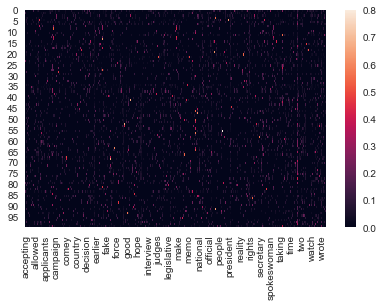

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style

sns.heatmap(input_training_features)

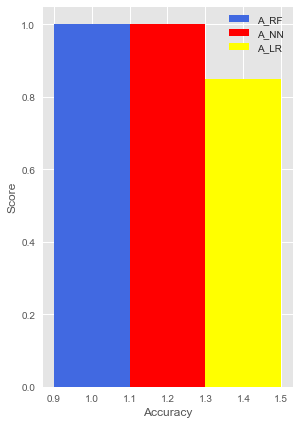

In [84]:
style.use('ggplot')
plt.figure(figsize=(4,7))
barWidth=0.2
plt.bar(1,Accuracy_RF,color='royalblue',width=barWidth,label='A_RF')
plt.bar(1.2,Accuracy_NN,color='red',width=barWidth,label='A_NN')
plt.bar(1.4,Accuracy_LR,color='yellow',width=barWidth,label='A_LR')
plt.xlabel("Accuracy")
plt.ylabel("Score")
plt.legend()

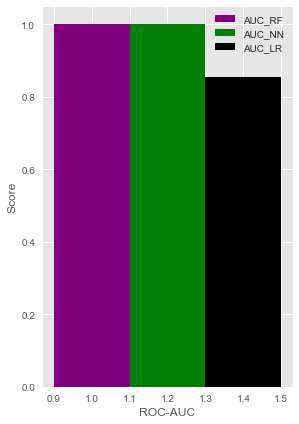

In [86]:
style.use('ggplot')
plt.figure(figsize=(4,7))
barWidth=0.2
plt.bar(1,roc_auc_RF,color='purple',width=barWidth,label='AUC_RF')
plt.bar(1.2,roc_auc_NN,color='green',width=barWidth,label='AUC_NN')
plt.bar(1.4,roc_auc_LR,color='black',width=barWidth,label='AUC_LR')
plt.xlabel("ROC-AUC")
plt.ylabel("Score")
plt.legend()